In [1]:
import os
import tensorflow as tf

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

# Два вычислительных графа

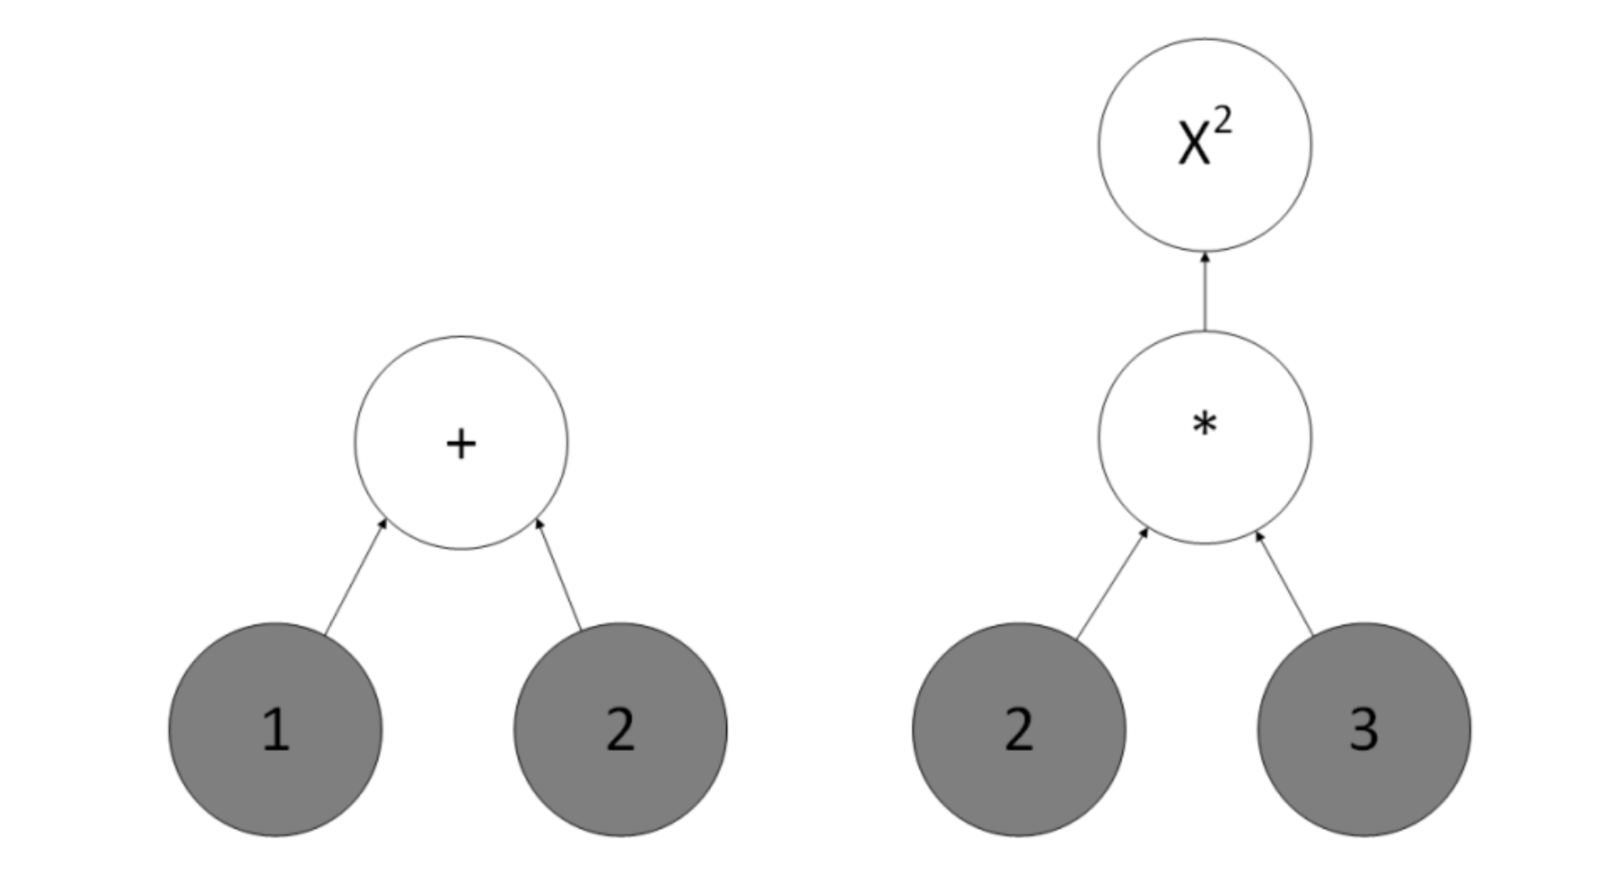

In [24]:
from IPython import display
display.Image("graphs.png")

In [9]:
add_function_tflow = tf.function(tf.add)

# Объявляем константы
a = tf.constant(1.0)
b = tf.constant(2.0)

orig_value = tf.add(a, b).numpy()
tf_function_value = add_function_tflow(a, b).numpy()
assert(orig_value == tf_function_value)

In [11]:
print(add_function_tflow(a,b))

tf.Tensor(3.0, shape=(), dtype=float32)


In [10]:
print(add_function_tflow.get_concrete_function(a, b).graph.as_graph_def())

node {
  name: "x"
  op: "Placeholder"
  attr {
    key: "_user_specified_name"
    value {
      s: "x"
    }
  }
  attr {
    key: "dtype"
    value {
      type: DT_FLOAT
    }
  }
  attr {
    key: "shape"
    value {
      shape {
      }
    }
  }
}
node {
  name: "y"
  op: "Placeholder"
  attr {
    key: "_user_specified_name"
    value {
      s: "y"
    }
  }
  attr {
    key: "dtype"
    value {
      type: DT_FLOAT
    }
  }
  attr {
    key: "shape"
    value {
      shape {
      }
    }
  }
}
node {
  name: "Add"
  op: "Add"
  input: "x"
  input: "y"
  attr {
    key: "T"
    value {
      type: DT_FLOAT
    }
  }
}
node {
  name: "Identity"
  op: "Identity"
  input: "Add"
  attr {
    key: "T"
    value {
      type: DT_FLOAT
    }
  }
}
versions {
  producer: 119
}



In [15]:
def two_function(a, b):
    a = tf.math.multiply(a, b)
    return tf.pow(a,2)

two_function_tflow = tf.function(two_function)

# Объявляем константы
a = tf.constant(2.0)
b = tf.constant(3.0)

orig_value = two_function(a, b).numpy()
tf_function_value = two_function_tflow(a, b).numpy()
assert(orig_value == tf_function_value)

In [16]:
print(two_function_tflow(a,b))

tf.Tensor(36.0, shape=(), dtype=float32)


# Нейронная сеть с 5 полносвязными слоями для классификации набора данных MNIST с количеством нейронов в слоях от первого до пятого (200, 100, 60, 30, 10)

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

7


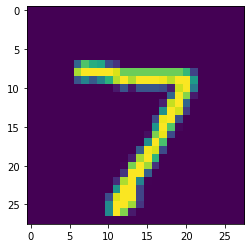

In [5]:
print(y_test[0])

plt.imshow(x_test[0,:,:])

2


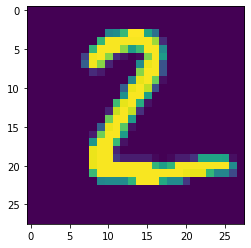

In [6]:
print(y_test[1])

plt.imshow(x_test[1,:,:])

1


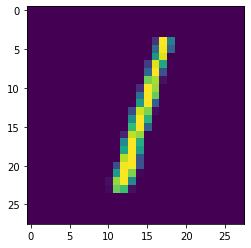

In [7]:
print(y_test[2])

plt.imshow(x_test[2,:,:])

In [8]:
# предобработка
x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

y_train = y_train.astype("float32")
y_test = y_test.astype("float32")

x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

In [11]:
def create_model(LEARNING_RATE):
    L1 = 200
    L2 = 100
    L3 = 60
    L4 = 30
    L5 = 10

    model = tf.keras.models.Sequential([
        tf.keras.Input(shape=(784,)),
        tf.keras.layers.Dense(L1, activation="relu"),
        tf.keras.layers.Dense(L2, activation="relu"),
        tf.keras.layers.Dense(L3, activation="relu"),
        tf.keras.layers.Dense(L4, activation="relu"),
        tf.keras.layers.Dense(L5, activation="softmax")
    ])
    model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=LEARNING_RATE),  # стохастический градиентный спуск
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy'])
    
    return model

In [12]:
LEARNING_RATE = 0.5

model = create_model(LEARNING_RATE)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               157000    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_2 (Dense)              (None, 60)                6060      
_________________________________________________________________
dense_3 (Dense)              (None, 30)                1830      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                310       
Total params: 185,300
Trainable params: 185,300
Non-trainable params: 0
_________________________________________________________________


In [13]:
checkpoint_path = "model/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1,
                                                 max_to_keep=7, 
                                                 keep_checkpoint_every_n_hours=1)

In [14]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(
    log_dir="/Users/nonpenguin/my/терехов/lab3/log",
    histogram_freq=1,  
    embeddings_freq=1,  
    update_freq="epoch",
) 

In [15]:
%reload_ext tensorboard

NUM_STEPS = 10
MINIBATCH_SIZE = 100 

model.fit(
    x_train,
    y_train,
    batch_size=MINIBATCH_SIZE,
    epochs=NUM_STEPS,
    verbose=2,
    validation_data=(x_val, y_val),
    callbacks=[tensorboard_callback, cp_callback]
)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10

Epoch 00001: saving model to model/cp.ckpt
50000/50000 - 3s - loss: 0.5719 - accuracy: 0.8138 - val_loss: 0.1712 - val_accuracy: 0.9524
Epoch 2/10

Epoch 00002: saving model to model/cp.ckpt
50000/50000 - 2s - loss: 0.1519 - accuracy: 0.9542 - val_loss: 0.1205 - val_accuracy: 0.9625
Epoch 3/10

Epoch 00003: saving model to model/cp.ckpt
50000/50000 - 2s - loss: 0.1057 - accuracy: 0.9686 - val_loss: 0.1118 - val_accuracy: 0.9667
Epoch 4/10

Epoch 00004: saving model to model/cp.ckpt
50000/50000 - 2s - loss: 0.0775 - accuracy: 0.9771 - val_loss: 0.0958 - val_accuracy: 0.9727
Epoch 5/10

Epoch 00005: saving model to model/cp.ckpt
50000/50000 - 2s - loss: 0.0648 - accuracy: 0.9797 - val_loss: 0.0939 - val_accuracy: 0.9738
Epoch 6/10

Epoch 00006: saving model to model/cp.ckpt
50000/50000 - 2s - loss: 0.0547 - accuracy: 0.9833 - val_loss: 0.0907 - val_accuracy: 0.9747
Epoch 7/10

Epoch 00007: saving model to model/cp.ckpt
50000/5

In [16]:
!ls {checkpoint_dir}

checkpoint                  cp.ckpt.index
cp.ckpt.data-00000-of-00001


In [17]:
results = model.evaluate(x_test, y_test, batch_size=128, verbose=0)
dict(zip(model.metrics_names, results))

{'loss': 0.09534117475392413, 'accuracy': 0.9755}

In [18]:
print("Предскажем 3 значения")
predictions = model.predict(x_test[:3])
predictions

Предскажем 3 значения


array([[4.5256745e-09, 1.3199711e-07, 3.1175426e-07, 3.9486082e-08,
        3.2260976e-09, 1.8406558e-07, 2.6529589e-11, 9.9999607e-01,
        8.7149798e-10, 3.2081541e-06],
       [1.0951800e-08, 4.0352543e-06, 9.9999177e-01, 3.1040913e-06,
        1.2025164e-09, 8.5809228e-11, 1.9922124e-09, 1.0903548e-06,
        2.4441391e-08, 8.6044581e-11],
       [1.7083678e-11, 9.9999106e-01, 1.5949388e-08, 5.4624683e-09,
        2.8483992e-08, 3.9395140e-09, 4.6462394e-09, 8.1366516e-06,
        7.2733684e-07, 4.7172769e-08]], dtype=float32)

In [19]:
np.argmax(predictions, axis=1)

array([7, 2, 1])

# Восстановление модели

In [21]:
new_model = create_model(0.5)
results = new_model.evaluate(x_test, y_test, batch_size=128, verbose=0)
dict(zip(new_model.metrics_names, results))

{'loss': 2.3315212547302244, 'accuracy': 0.0892}

In [22]:
new_model.load_weights(checkpoint_path)

In [23]:
results = new_model.evaluate(x_test, y_test, batch_size=128, verbose=0)
dict(zip(new_model.metrics_names, results))

{'loss': 0.09534117475392413, 'accuracy': 0.9755}